In [1]:
#Importing the relavant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import nltk
import re

from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams

nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score


from wordcloud import WordCloud,STOPWORDS

from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to C:\Users\Keshan
[nltk_data]     Pathirana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Keshan
[nltk_data]     Pathirana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Reading the data.
df = pd.read_csv("./Dataset/tripadvisor_hotel_reviews.csv")

In [4]:
#Checking the dataframe.
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#Dataframe shape
df.shape

(20491, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df.nunique()

Review    20491
Rating        5
dtype: int64

In [8]:
#Checking whether there are null values in the dataframe.
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


### EDA

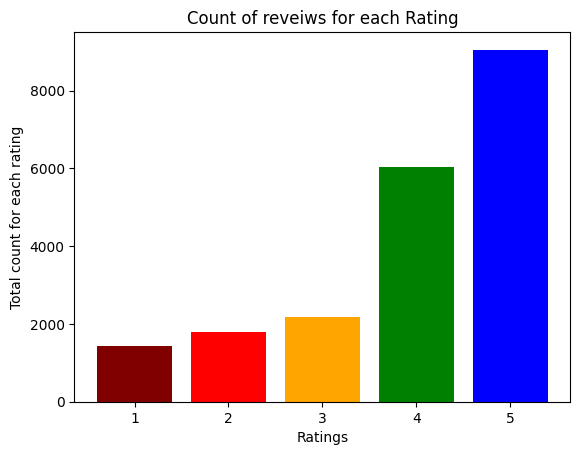

In [10]:
#Bar plot to represent the count for each rating in the dataframe
counter = df.Rating.value_counts()
index = counter.index
plt.figure(1)
plt.bar(index, counter, color = [ 'blue', 'green', 'orange', 'red', 'maroon' ])
plt.xlabel("Ratings")
plt.ylabel("Total count for each rating")
plt.title("Count of reveiws for each Rating")
plt.show()

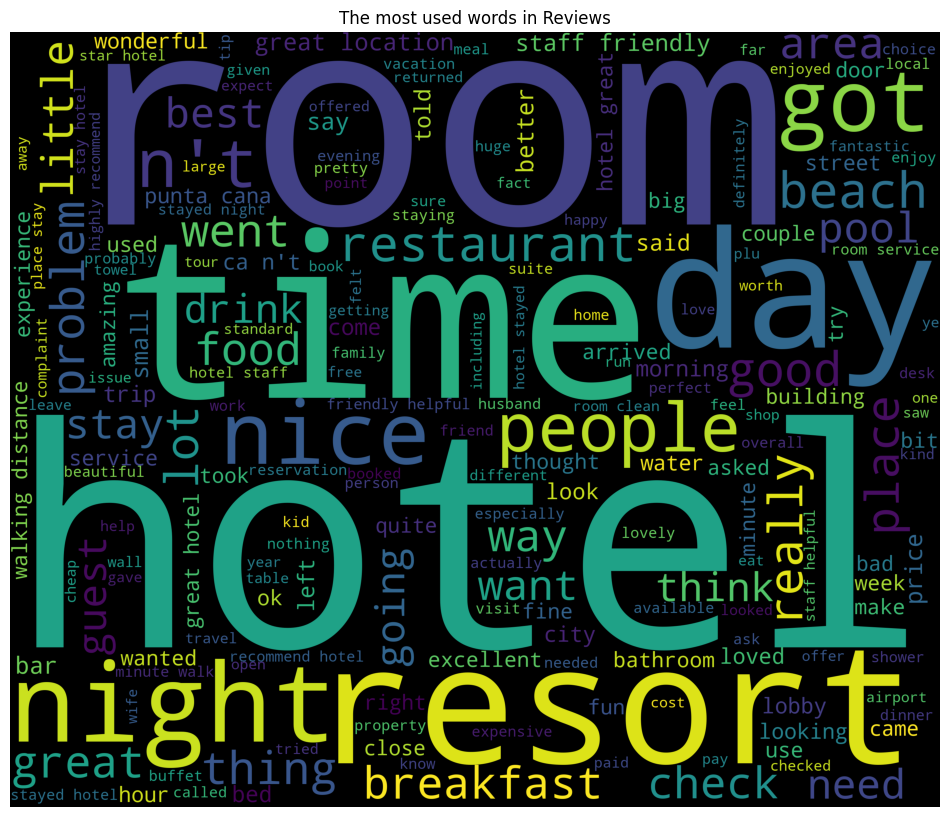

In [11]:
#Worldcloud to visualize the most used words in reviews.
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500,
                      min_font_size = 10
                      ).generate(' '.join(df['Review'].values))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("The most used words in Reviews")
plt.show()

In [12]:
df.Review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [13]:
df['Review'].nunique()

20491

In [14]:
type(df['Review'])

pandas.core.series.Series

### Processing the Reviews text data

In [15]:
def clean_text(text):
    
    #taking only letters
    text = re.sub("[^a-zA-Z]", " ", text)
    
    #Converting to lowercase
    text = text.lower()
    
    #Removing stop words 
    stop_words = stopwords.words('english')
    text_without_sw = " ".join([j for j in text.split() if j not in stop_words]) 
    
    #Tokenize
    #text_tokens = nltk.word_tokenize(text)
   
    #Removing punctuations and numbers 
    #text_tokens_bigrams = [ i for i in text_tokens_bigrams if i.isalpha() ]

    

    #Stemming
    ps = PorterStemmer()
    text_cleaned = " ".join([ps.stem(word) for word in text_without_sw.split()])

    #joining
    return text_cleaned
    

In [16]:
df['cleaned_text'] = df['Review'].apply(clean_text)
df.head()

,Review,Rating,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [17]:
df.cleaned_text[0]

'nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night'

In [18]:
X = df['cleaned_text']
Y = df['Rating']
X.shape
type(X)

pandas.core.series.Series

In [19]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }

labels = ['1', '2', '3', '4', '5']
           
y = df['Rating'].copy()
y.replace(encoding, inplace=True)

### Splitting to training and testing datasets

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [21]:
type(X_train)

pandas.core.series.Series

### Tokenization

In [23]:
X_train = [nltk.word_tokenize(text) for text in X_train]

In [24]:
X_train[0]

['outstand',
 'cleanli',
 'valu',
 'locat',
 'want',
 'stay',
 'central',
 'locat',
 'london',
 'luna',
 'simon',
 'hotel',
 'fell',
 'search',
 'area',
 'check',
 'review',
 'trip',
 'advisor',
 'decid',
 'book',
 'certainli',
 'dissapoint',
 'locat',
 'ideal',
 'short',
 'walk',
 'transit',
 'import',
 'sight',
 'see',
 'locat',
 'absolut',
 'cleanest',
 'hotel',
 'stay',
 'breakfast',
 'good',
 'serv',
 'manag',
 'give',
 'chanc',
 'talk',
 'owner',
 'manag',
 'staff',
 'outstand',
 'friendli',
 'assist',
 'site',
 'see',
 'plan',
 'addit',
 'charg',
 'fact',
 'probabl',
 'save',
 'money',
 'got',
 'london',
 'bu',
 'tour',
 'ticket',
 'hotel',
 'vendor',
 'rate',
 'think',
 'trip',
 'uk',
 'europ',
 'luna',
 'simon',
 'london',
 'hotel',
 'stay',
 'go',
 'london',
 'reccomend',
 'luna',
 'simon']

### Vectorization

In [25]:
tf_vec = TfidfVectorizer(max_features = 3000, lowercase = False)
X_tfidf = tf_vec.fit_transform([' '.join(arr) for arr in X_train])
X_tfidf.shape

(16392, 3000)

In [27]:
#Handling the imbalance in data
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(X_tfidf,Y_train)

### Model Fitting

In [28]:
RF_model = RandomForestClassifier()
RF_model.fit(x_sm, y_sm)

RandomForestClassifier()

In [29]:
RF_prediction = RF_model.predict(tf_vec.transform(X_test))
print(accuracy_score(RF_prediction, Y_test))

0.5559892656745548


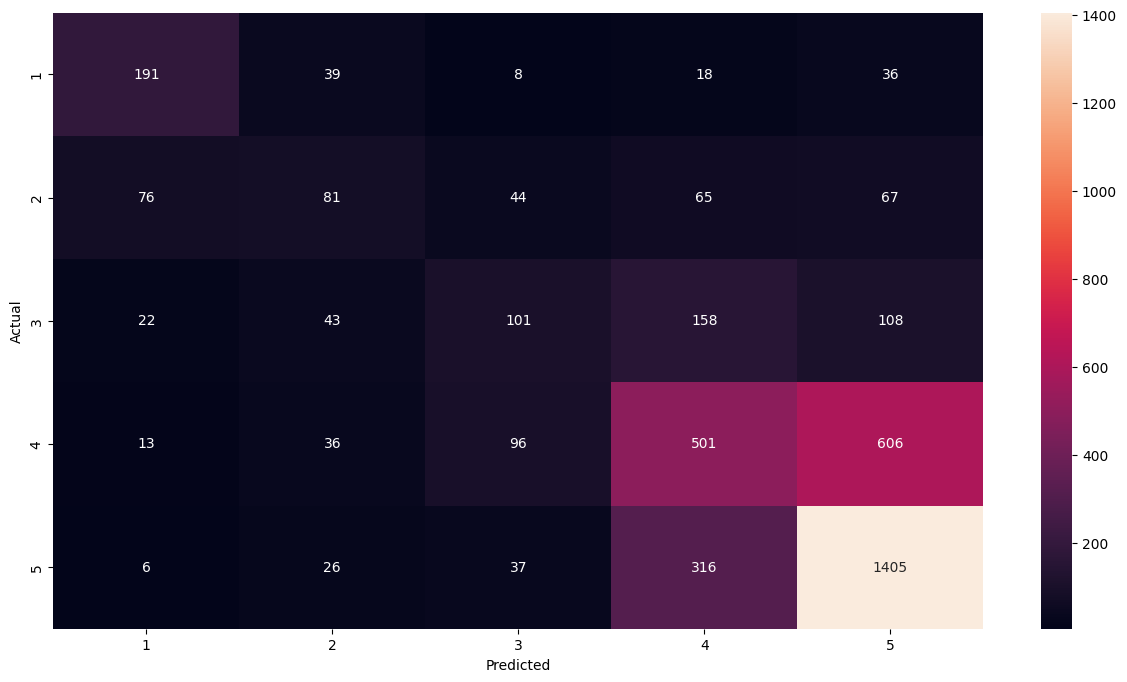

In [31]:
cm = confusion_matrix(Y_test,RF_prediction)

cm_fig = pd.DataFrame(
    cm, index = ['1', '2', '3', '4', '5'],
    columns = ['1', '2', '3', '4', '5']
)

plt.figure(figsize = (15,8))
sns.heatmap(cm_fig, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
cr = classification_report(Y_test, RF_prediction)

In [33]:
print(cr)

              precision    recall  f1-score   support

           1       0.62      0.65      0.64       292
           2       0.36      0.24      0.29       333
           3       0.35      0.23      0.28       432
           4       0.47      0.40      0.43      1252
           5       0.63      0.78      0.70      1790

    accuracy                           0.56      4099
   macro avg       0.49      0.46      0.47      4099
weighted avg       0.53      0.56      0.54      4099



In [34]:
logreg_model =  LogisticRegression(solver='saga', max_iter=400) 
logreg_model.fit(X_tfidf, Y_train)

LogisticRegression(max_iter=400, solver='saga')

In [35]:
logreg_prediction = logreg_model.predict(tf_vec.transform(X_test))
print(accuracy_score(logreg_prediction, Y_test))

0.6257623810685533


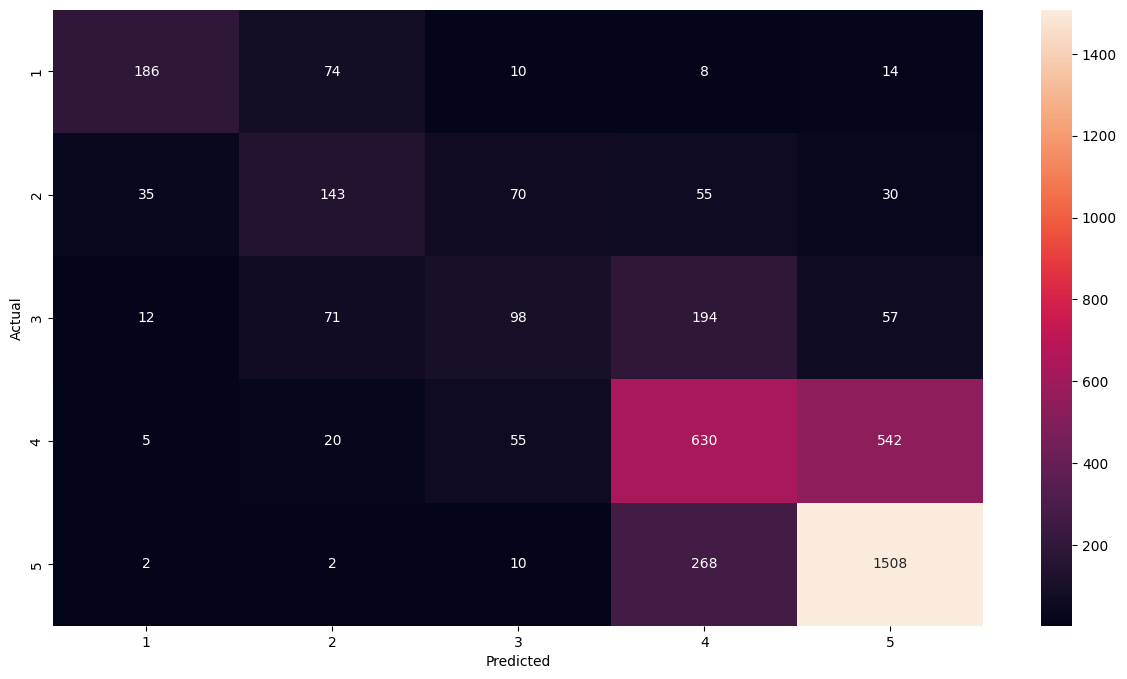

In [46]:
cm = confusion_matrix(Y_test,logreg_prediction)

cm_fig = pd.DataFrame(
    cm, index = ['1', '2', '3', '4', '5'],
    columns = ['1', '2', '3', '4', '5']
)

plt.figure(figsize = (15,8))
sns.heatmap(cm_fig, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
cr = classification_report(Y_test, logreg_prediction)

In [38]:
print(cr)

              precision    recall  f1-score   support

           1       0.78      0.64      0.70       292
           2       0.46      0.43      0.44       333
           3       0.40      0.23      0.29       432
           4       0.55      0.50      0.52      1252
           5       0.70      0.84      0.77      1790

    accuracy                           0.63      4099
   macro avg       0.58      0.53      0.54      4099
weighted avg       0.61      0.63      0.61      4099



### Testing the data

In [39]:
print(logreg_prediction)

[1 4 3 ... 3 5 5]


In [40]:
print(Y_test)

10726    1
14919    4
19098    3
2450     4
960      5
        ..
1576     3
18714    5
12690    4
18095    5
11836    5
Name: Rating, Length: 4099, dtype: int64


In [41]:
tf_vec.transform(pd.Series(df.Review[0]))

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [42]:
logreg_model.predict(tf_vec.transform(pd.Series(df.Review[3])))

array([5], dtype=int64)

### Pickling the two model for deployment

In [43]:
pickle.dump(logreg_model,open('logreg_model.pkl', 'wb'))

In [44]:
model = pickle.load(open('logreg_model.pkl', 'rb'))

In [45]:
model.predict(tf_vec.transform(pd.Series(df.Review[3])))

array([5], dtype=int64)